In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from si_prefix import si_format
from plot_labler import axes_labels

def sigfig_format(val, sigfigs = 3):
    precision = max(0, sigfigs - np.floor(np.log10(val)) % 3 - 1)
    return si_format(val, precision = precision)

In [93]:
df_vtc = pd.read_csv("opamp_vtc_2.txt", delimiter = "\s+")

df_vtc.rename({"v(V1)": "V1", "v(V2)": "V2", "v(Vout)": "Vout"}, axis = "columns", inplace = True)
df_vtc.drop("v-sweep", axis = "columns", inplace = True)
print(df_vtc.head(5))

      V1   V2      Vout
0  0.000  0.0  0.690751
1  0.001  0.0  0.690751
2  0.002  0.0  0.690751
3  0.003  0.0  0.690751
4  0.004  0.0  0.690751


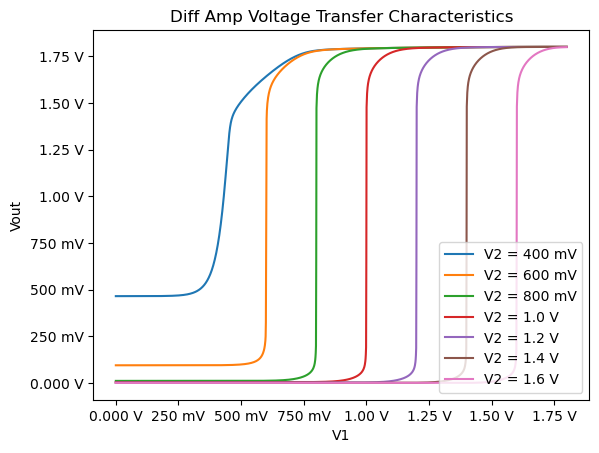

In [94]:
# df_vtc["V1"].diff() < 0
plt.figure()
axes_labels("V1", "V", "Vout", "V", "Diff Amp Voltage Transfer Characteristics")
for v2_val in [0.4,0.6, 0.8, 1.0, 1.2, 1.4, 1.6]:
    this_sweep = df_vtc[df_vtc["V2"] == v2_val]
    plt.plot(np.array(this_sweep["V1"]), np.array(this_sweep["Vout"]), label = f"V2 = {sigfig_format(v2_val, sigfigs = 2)}V")
plt.legend(loc = "lower right")